# Librerias

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, accuracy_score, f1_score, classification_report

from unidecode import unidecode

# Base de datos

### Tabla conformada por modificaciones y uniones previas del total de tablas de Olist.

In [2]:
final_data = pd.read_csv("final_data.csv")
final_data

,Unnamed: 0,order_id,media_review_score,fecha_ultima_review,order_purchase_timestamp,delivered_status,delay_time,customer_unique_id,customer_state,number_payments,...,product_id,seller_id,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,seller_state
0,0,00010242fe8c5a6d1ba2dd792cb16214,5,2017-09-21,2017-09-13,1,9,871766c5855e863f6eccc05f988b23cb,Southeast,1.0,...,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,598.0,4.0,650.0,28.0,9.0,14.0,Miscellaneous and Other Items,Southeast
1,1,00018f77f2f0320c557190d7a144bdd3,4,2017-05-13,2017-04-26,1,3,eb28e67c4c0b83846050ddfb8a35d051,Southeast,1.0,...,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.0,2.0,30000.0,50.0,30.0,40.0,Miscellaneous and Other Items,Southeast
2,2,000229ec398224ef6ca0657da4fc703e,5,2018-01-23,2018-01-14,1,14,3818d81c6709e39d06b2738a8d3a2474,Southeast,1.0,...,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,695.0,2.0,3050.0,33.0,13.0,33.0,Home and Decoration,Southeast
3,3,00024acbcdf0a6daa1e931b038114c75,4,2018-08-15,2018-08-08,1,6,af861d436cfc08b2c2ddefd0ba074622,Southeast,1.0,...,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,480.0,1.0,200.0,16.0,10.0,15.0,Fashion and Personal Care,Southeast
4,4,00042b26cf59d7ce69dfabb4e55b4fd9,5,2017-03-02,2017-02-04,1,16,64b576fb70d441e8f1b2d7d446e483c5,Southeast,1.0,...,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,409.0,1.0,3750.0,35.0,40.0,30.0,Tools and Construction,South
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97911,98668,fffc94f6ce00a00581880bf54a75a037,5,2018-05-11,2018-04-23,1,8,0c9aeda10a71f369396d0c04dce13a64,Northeast,1.0,...,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,1002.0,3.0,10150.0,89.0,15.0,40.0,Home and Decoration,South
97912,98669,fffcd46ef2263f404302a634eb57f7eb,5,2018-07-24,2018-07-14,1,9,0da9fe112eae0c74d3ba1fe16de0988b,South,1.0,...,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,232.0,1.0,8950.0,45.0,26.0,38.0,Electronics and Technology,Southeast
97913,98670,fffce4705a9662cd70adb13d4a31832d,5,2017-10-29,2017-10-23,1,13,cd79b407828f02fdbba457111c38e4c4,Southeast,1.0,...,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,869.0,1.0,967.0,21.0,24.0,19.0,"Leisure, Toys and Arts",South
97914,98671,fffe18544ffabc95dfada21779c9644f,5,2017-08-17,2017-08-14,1,9,eb803377c9315b564bdedad672039306,Southeast,1.0,...,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,1306.0,1.0,100.0,20.0,20.0,20.0,Electronics and Technology,Southeast


In [3]:
final_data.shape

(97916, 26)

In [4]:
final_data.columns

Index(['Unnamed: 0', 'order_id', 'media_review_score', 'fecha_ultima_review',
       'order_purchase_timestamp', 'delivered_status', 'delay_time',
       'customer_unique_id', 'customer_state', 'number_payments',
       'payment_value_sum', 'payment_type', 'number_items', 'total_price',
       'total_freight_value', 'total_diff_items', 'product_id', 'seller_id',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'product_category_name_english', 'seller_state'],
      dtype='object')

# Limpieza de datos + Ajuste de columnas a utilizar

Se pasan los datos de Review a binarios en donde quedará con dos valores: 1 para review de cliente muy satisfecho y 0 para clientes no muy satisfechos.

In [5]:
final_data["review"]= np.where(final_data["media_review_score"]>= 5,1,0)

Se quitan las columnas que corresponden a un ID ya que no aportan al patron y generan overfitting.

Se eliminan las columnas de fechas y otras que alteran al modelo:

- order_id,
- customer_unique_id, 
- product_id, 
- seller_id, 
- fecha_ultima_review, 
- order_purchase_timestamp, 
- media_review_score, 
- Unnamed: 0

Se reduce a Flags
- customer_state
- seller_state
- payment_type

Se descartan filas con customer_state y/o seller_state en desconocido para evitar alterar las metricas.

In [6]:
final_data["delayed_order"] = np.where(final_data["delay_time"] < 0, 1,0)
final_data = final_data[
    (final_data["customer_state"] != "unknown") &
    (final_data["seller_state"] != "unknown")
]
final_data["customer_southeast_state"] = np.where(final_data["customer_state"] == "Southeast",1,0)
final_data = final_data.drop(columns = "customer_state")

final_data["seller_southeast_state"] = np.where(final_data["seller_state"] == "Southeast",1,0)
final_data = final_data.drop(columns = "seller_state")

final_data["credit_card_payment"] = np.where(final_data["payment_type"] == "credit_card",1,0)
final_data = final_data.drop(columns = "payment_type")

final_data = final_data.drop(columns=["order_id", "customer_unique_id", "product_id", "seller_id", "fecha_ultima_review", "order_purchase_timestamp", "media_review_score", "Unnamed: 0", "delay_time"])

C:\Users\jacin\AppData\Local\Temp\ipykernel_12196\1275326867.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data["customer_southeast_state"] = np.where(final_data["customer_state"] == "Southeast",1,0)


In [7]:
final_data.head(5)

,delivered_status,number_payments,payment_value_sum,number_items,total_price,total_freight_value,total_diff_items,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,review,delayed_order,customer_southeast_state,seller_southeast_state,credit_card_payment
0,1,1.0,72.19,1.0,58.90,13.29,1.0,598.0,4.0,650.0,28.0,9.0,14.0,Miscellaneous and Other Items,1,0,1,1,1
1,1,1.0,259.83,1.0,239.90,19.93,1.0,239.0,2.0,30000.0,50.0,30.0,40.0,Miscellaneous and Other Items,0,0,1,1,1
2,1,1.0,216.87,1.0,199.00,17.87,1.0,695.0,2.0,3050.0,33.0,13.0,33.0,Home and Decoration,1,0,1,1,1
3,1,1.0,25.78,1.0,12.99,12.79,1.0,480.0,1.0,200.0,16.0,10.0,15.0,Fashion and Personal Care,0,0,1,1,1
4,1,1.0,218.04,1.0,199.90,18.14,1.0,409.0,1.0,3750.0,35.0,40.0,30.0,Tools and Construction,1,0,1,0,1


In [8]:
final_data.shape

(94719, 19)

# Graficos de variables

### Countplot de las siguientes variables:
- review
- product_category_name_english
- seller_state
- credit_card_payment
- number_items

<Axes: xlabel='review', ylabel='count'>

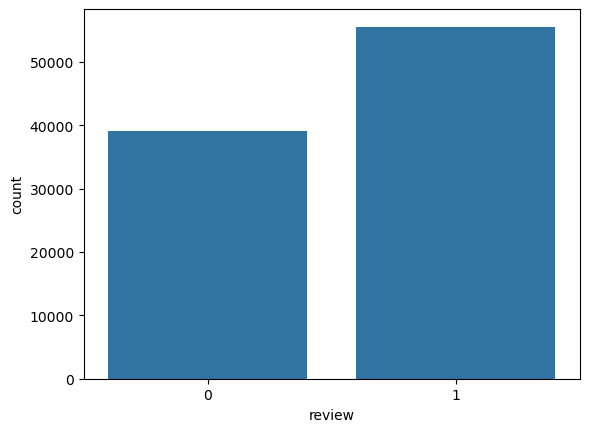

In [9]:
sns.countplot(
    data = final_data, 
    x= "review")

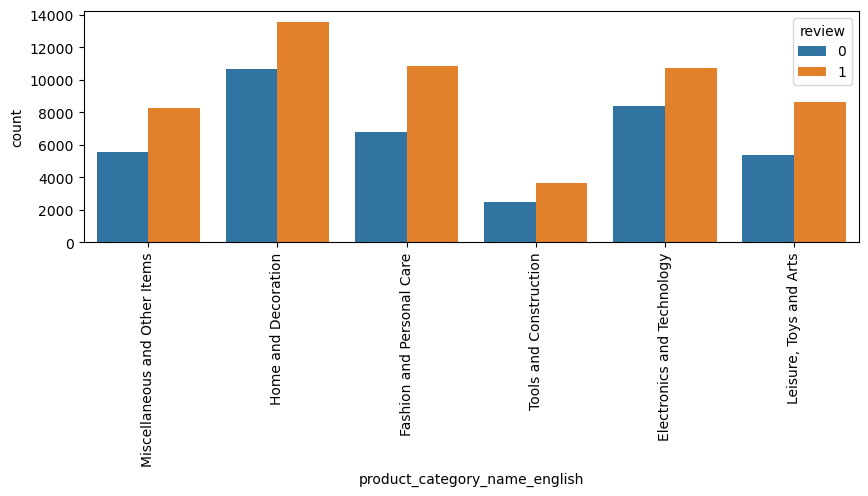

In [10]:
plt.figure(figsize = (10,3))
sns.countplot(
    data = final_data, 
    x= "product_category_name_english", 
    hue = "review")
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='credit_card_payment', ylabel='count'>

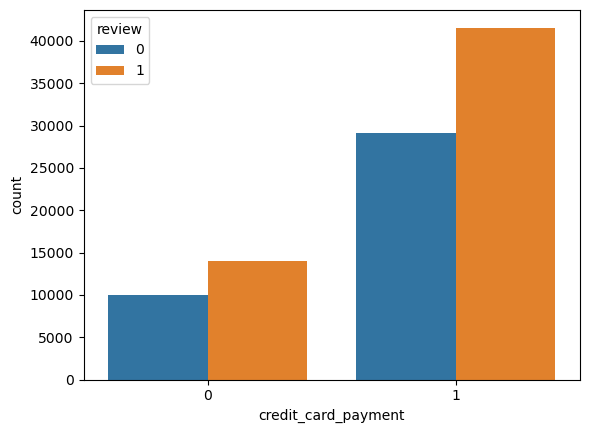

In [11]:
sns.countplot(
    data = final_data, 
    x= "credit_card_payment", 
    hue = "review",
    )

<Axes: xlabel='number_items', ylabel='count'>

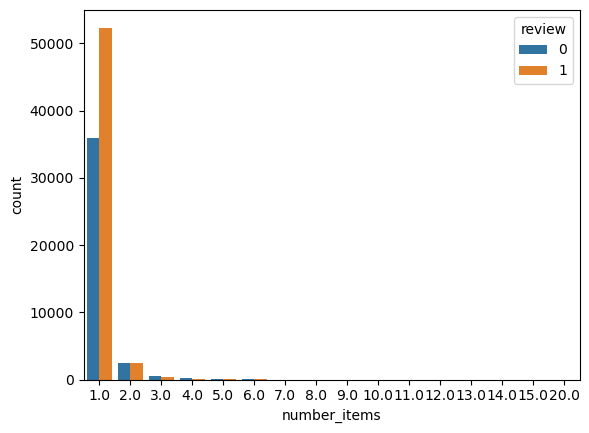

In [12]:
sns.countplot(
    data = final_data, 
    x= "number_items", 
    hue = "review",
    )

### Histplot de las siguientes variables:
- total_price
- product_description_lenght
- product_photos_qty
- total_freight_value

<Axes: xlabel='total_price', ylabel='Count'>

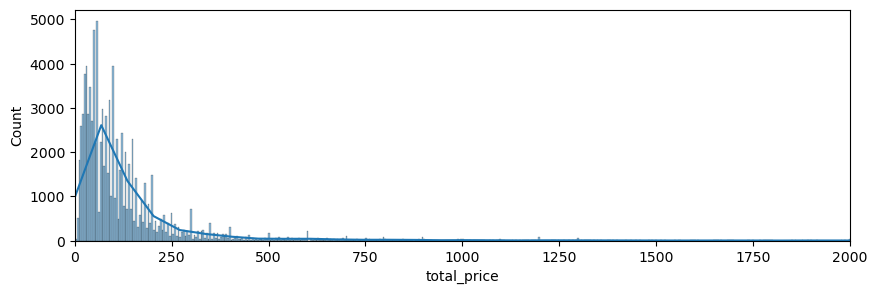

In [13]:
plt.figure(figsize = (10,3))
plt.xlim((0,2000))
sns.histplot(
    data = final_data["total_price"], 
    kde = True)

<Axes: xlabel='product_description_lenght', ylabel='Count'>

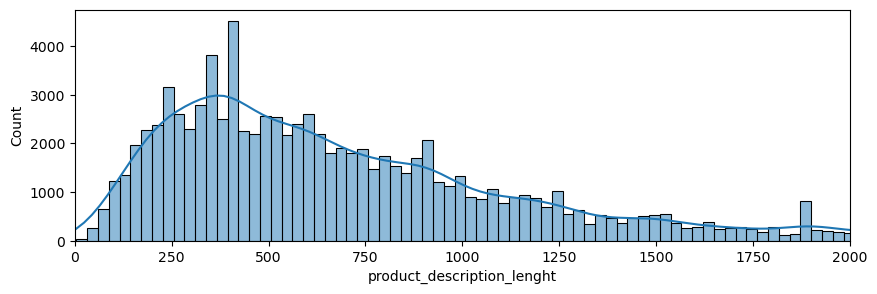

In [14]:
plt.figure(figsize = (10,3))
plt.xlim((0,2000))
sns.histplot(
    data = final_data["product_description_lenght"], 
    kde = True)

<Axes: xlabel='product_photos_qty', ylabel='Count'>

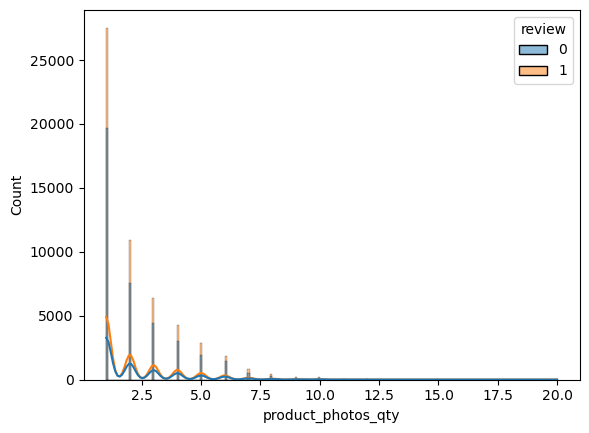

In [15]:
sns.histplot(
    data = final_data,
    x = "product_photos_qty",
    hue = "review",
    kde = True
)

<Axes: xlabel='total_freight_value', ylabel='Count'>

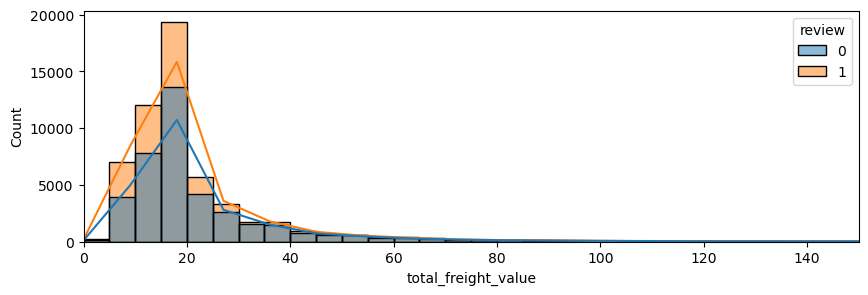

In [16]:
plt.figure(figsize = (10,3))
plt.xlim((0,150))
sns.histplot(data = final_data, x= "total_freight_value", hue = "review", kde = True, binwidth = 5)

# Generacion de Dummies de las columnas de texto

### Transformacion a Dummies de siguientes columnas: 
- product_category_name_english

In [17]:
final_data = pd.get_dummies(
    final_data,
    columns = ["product_category_name_english"],
    drop_first = True
)

In [18]:
final_data

,delivered_status,number_payments,payment_value_sum,number_items,total_price,total_freight_value,total_diff_items,product_description_lenght,product_photos_qty,product_weight_g,...,review,delayed_order,customer_southeast_state,seller_southeast_state,credit_card_payment,product_category_name_english_Fashion and Personal Care,product_category_name_english_Home and Decoration,"product_category_name_english_Leisure, Toys and Arts",product_category_name_english_Miscellaneous and Other Items,product_category_name_english_Tools and Construction
0,1,1.0,72.19,1.0,58.90,13.29,1.0,598.0,4.0,650.0,...,1,0,1,1,1,False,False,False,True,False
1,1,1.0,259.83,1.0,239.90,19.93,1.0,239.0,2.0,30000.0,...,0,0,1,1,1,False,False,False,True,False
2,1,1.0,216.87,1.0,199.00,17.87,1.0,695.0,2.0,3050.0,...,1,0,1,1,1,False,True,False,False,False
3,1,1.0,25.78,1.0,12.99,12.79,1.0,480.0,1.0,200.0,...,0,0,1,1,1,True,False,False,False,False
4,1,1.0,218.04,1.0,199.90,18.14,1.0,409.0,1.0,3750.0,...,1,0,1,0,1,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97911,1,1.0,343.40,1.0,299.99,43.41,1.0,1002.0,3.0,10150.0,...,1,0,0,0,0,False,True,False,False,False
97912,1,1.0,386.53,1.0,350.00,36.53,1.0,232.0,1.0,8950.0,...,1,0,0,1,0,False,False,False,False,False
97913,1,1.0,116.85,1.0,99.90,16.95,1.0,869.0,1.0,967.0,...,1,0,1,0,1,False,False,True,False,False
97914,1,1.0,64.71,1.0,55.99,8.72,1.0,1306.0,1.0,100.0,...,1,0,1,1,1,False,False,False,False,False


In [19]:
final_data.columns

Index(['delivered_status', 'number_payments', 'payment_value_sum',
       'number_items', 'total_price', 'total_freight_value',
       'total_diff_items', 'product_description_lenght', 'product_photos_qty',
       'product_weight_g', 'product_length_cm', 'product_height_cm',
       'product_width_cm', 'review', 'delayed_order',
       'customer_southeast_state', 'seller_southeast_state',
       'credit_card_payment',
       'product_category_name_english_Fashion and Personal Care',
       'product_category_name_english_Home and Decoration',
       'product_category_name_english_Leisure, Toys and Arts',
       'product_category_name_english_Miscellaneous and Other Items',
       'product_category_name_english_Tools and Construction'],
      dtype='object')

# Descarte de columnas mediante VIF

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

def pesos_variables(final_data):
    TARGET = "review"
    
    X = final_data.drop(columns=[TARGET])
    X = X.select_dtypes(include=[np.number])
    X = X.dropna()
    X_const = add_constant(X)
    
    vif_data = pd.DataFrame()
    vif_data["feature"] = X_const.columns
    vif_data["VIF"] = [
        variance_inflation_factor(X_const.values, i)
        for i in range(X_const.shape[1])
    ]
    
    vif_data = vif_data[vif_data["feature"] != "const"]
    vif_data = vif_data.sort_values("VIF", ascending=False).reset_index(drop=True)
    return vif_data



In [21]:
vif_data = pesos_variables(final_data)
vif_data

,feature,VIF
0,payment_value_sum,44087.366402
1,total_price,40443.781736
2,total_freight_value,387.220621
3,total_diff_items,99.579637
4,product_weight_g,2.525056
5,product_width_cm,1.651658
6,product_length_cm,1.559139
7,product_height_cm,1.545711
8,number_items,1.304485
9,delayed_order,1.301810


In [22]:
final_data = final_data.drop(columns = ["payment_value_sum"])

In [23]:
vif_data = pesos_variables(final_data)
vif_data

,feature,VIF
0,total_diff_items,99.579500
1,product_weight_g,2.524757
2,total_freight_value,2.086463
3,product_width_cm,1.651625
4,product_length_cm,1.559073
5,product_height_cm,1.545559
6,number_items,1.304441
7,delayed_order,1.301794
8,delivered_status,1.297460
9,total_price,1.283731


In [24]:
final_data = final_data.drop(columns = ["total_diff_items"])
vif_data = pesos_variables(final_data)
vif_data

,feature,VIF
0,product_weight_g,2.524757
1,total_freight_value,2.086463
2,product_width_cm,1.651625
3,product_length_cm,1.559073
4,product_height_cm,1.545559
5,number_items,1.304441
6,delayed_order,1.301794
7,delivered_status,1.297460
8,total_price,1.283731
9,customer_southeast_state,1.091628


# Division de Train y Test

### Porcentaje de separacion de 75% y 25% respectivamente 

In [25]:
X = final_data.loc[:, final_data.columns != "review"]
y = final_data.loc[:, "review"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    train_size = 0.75,
    test_size = 0.25
)

In [26]:
X_train.shape

(71039, 20)

In [27]:
X_train.shape

(71039, 20)

In [28]:
X_test.shape

(23680, 20)

# Normalizacion de datos

In [29]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled

array([[ 0.15121191, -0.11870506,  2.00176124, ..., -0.41385384,
        -0.41268657, -0.26407494],
       [ 0.15121191, -0.11870506, -0.21711151, ..., -0.41385384,
        -0.41268657, -0.26407494],
       [ 0.15121191, -0.11870506, -0.21711151, ..., -0.41385384,
         2.42314643, -0.26407494],
       ...,
       [ 0.15121191, -0.11870506, -0.21711151, ..., -0.41385384,
        -0.41268657, -0.26407494],
       [ 0.15121191, -0.11870506, -0.21711151, ..., -0.41385384,
        -0.41268657, -0.26407494],
       [ 0.15121191, -0.11870506, -0.21711151, ..., -0.41385384,
        -0.41268657, -0.26407494]])

## Seleccion de variables con RFE

In [30]:
lr = LogisticRegression(max_iter=1000, class_weight="balanced")

for i in range(1, 21):
    rfe = RFE(lr, n_features_to_select=i)
    rfe.fit(X_train_scaled, y_train)

    X_train_rfe = rfe.transform(X_train_scaled)
    X_test_rfe  = rfe.transform(X_test_scaled)

    modelo = LogisticRegression(max_iter=1000, class_weight="balanced")
    modelo.fit(X_train_rfe, y_train)

    y_proba = modelo.predict_proba(X_test_rfe)[:, 1]

    auc = roc_auc_score(y_test, y_proba)

    print(f"{i}: ROC-AUC = {auc:.4f}")

1: ROC-AUC = 0.5798
2: ROC-AUC = 0.5800
3: ROC-AUC = 0.5936
4: ROC-AUC = 0.6029
5: ROC-AUC = 0.6117
6: ROC-AUC = 0.6163
7: ROC-AUC = 0.6181
8: ROC-AUC = 0.6191
9: ROC-AUC = 0.6201
10: ROC-AUC = 0.6207
11: ROC-AUC = 0.6202
12: ROC-AUC = 0.6193
13: ROC-AUC = 0.6192
14: ROC-AUC = 0.6202
15: ROC-AUC = 0.6201
16: ROC-AUC = 0.6199
17: ROC-AUC = 0.6199
18: ROC-AUC = 0.6201
19: ROC-AUC = 0.6198
20: ROC-AUC = 0.6199


### Seleccion:  14 columnas = 0.6169

In [31]:
X_train.columns[rfe.support_]

Index(['delivered_status', 'number_payments', 'number_items', 'total_price',
       'total_freight_value', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm', 'delayed_order',
       'customer_southeast_state', 'seller_southeast_state',
       'credit_card_payment',
       'product_category_name_english_Fashion and Personal Care',
       'product_category_name_english_Home and Decoration',
       'product_category_name_english_Leisure, Toys and Arts',
       'product_category_name_english_Miscellaneous and Other Items',
       'product_category_name_english_Tools and Construction'],
      dtype='object')

In [32]:
X_train_final = X_train.loc[:, rfe.support_]
X_test_final = X_test.loc[:, rfe.support_]

# Preparación de modelo

Usamos class_weight="balanced cuando tenemos tanto desbalanceo de datos.

In [33]:
modelo = LogisticRegression(
    max_iter = 100000,
    class_weight="balanced")
modelo.fit(X_train_final, y_train)

C:\Users\jacin\AppData\Roaming\jupyterlab-desktop\jlab_server\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 12918 iteration(s) (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT

You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",'balanced'
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :ter

In [34]:
y_pred = modelo.predict(X_test_final)
y_pred_proba = modelo.predict_proba(X_test_final)[:, 1]

# Umbral

### Finalmente se establece el umbral en 0.54

In [35]:
y_pred = (y_pred_proba > 0.54) * 1

# Matriz de Confusión 

In [36]:
matriz_confusion = confusion_matrix(y_test, y_pred)

In [37]:
matriz_confusion

array([[5744, 4103],
       [6078, 7755]])

In [38]:
pd.DataFrame( #es lo mismo q ue arriba
    {"y_real" : y_test, 
     "y_pred": y_pred}
).groupby(["y_pred", "y_real"]).size()

y_pred  y_real
0       0         5744
        1         6078
1       0         4103
        1         7755
dtype: int64

In [39]:
TN = matriz_confusion[0][0]
TP = matriz_confusion[1][1]
FN = matriz_confusion[1][0]
FP = matriz_confusion[0][1]

## Accuracy

In [40]:
(TN + TP) / (TN + TP + FN + FP)

np.float64(0.5700591216216216)

## Sensibilidad

In [41]:
TP / (TP + FN)

np.float64(0.5606159184558664)

## Especificidad

In [42]:
TN / (TN + FP)

np.float64(0.5833248705189398)

## ROC AUC

In [43]:
especificidad_inv, sensibilidad, threshold = roc_curve(y_test, y_pred_proba)

In [44]:
roc_auc_score(y_test, y_pred_proba)

0.6196160358524094

## Grafico ROC AUC

In [45]:
recta_x = [i * 0.01 for i in range(101)]
recta_y = recta_x

<Axes: >

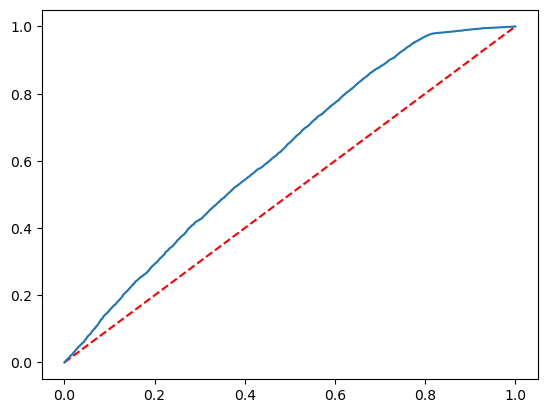

In [46]:
sns.lineplot(x = recta_x, y = recta_y, ls = "--",  color = "red")
sns.lineplot(x = especificidad_inv, y = sensibilidad)

# Cálculo de F1


In [47]:
umbral_optimo = 0.55

y_pred_ajustado = (y_pred_proba >= umbral_optimo).astype(int)
reporte = classification_report(y_test, y_pred_ajustado, 
                                target_names=['Clase 0 (Mala)', 'Clase 1 (Buena)'])

print("--- Reporte de Métricas de Clasificación (Umbral 0.55) ---\n")
print(reporte)

--- Reporte de Métricas de Clasificación (Umbral 0.55) ---

                 precision    recall  f1-score   support

 Clase 0 (Mala)       0.47      0.66      0.55      9847
Clase 1 (Buena)       0.66      0.48      0.56     13833

       accuracy                           0.55     23680
      macro avg       0.57      0.57      0.55     23680
   weighted avg       0.58      0.55      0.55     23680



In [48]:
real_balance = f1_score(y_test, y_pred)
real_balance

0.6037133626561831

In [49]:
coeficientes_std = modelo.coef_[0]

coef_data = pd.DataFrame({
    "feature": X_train_final.columns,
    "coeficiente_estandarizado": coeficientes_std,
    "peso_abs": np.abs(coeficientes_std)
}).sort_values("peso_abs", ascending=False)
coef_data

,feature,coeficiente_estandarizado,peso_abs
11,delayed_order,-2.102093,2.102093
0,delivered_status,0.776838,0.776838
17,"product_category_name_english_Leisure, Toys an...",0.297802,0.297802
15,product_category_name_english_Fashion and Pers...,0.272443,0.272443
19,product_category_name_english_Tools and Constr...,0.230415,0.230415
18,product_category_name_english_Miscellaneous an...,0.226122,0.226122
2,number_items,-0.205213,0.205213
16,product_category_name_english_Home and Decoration,0.088640,0.088640
12,customer_southeast_state,0.081035,0.081035
13,seller_southeast_state,-0.064341,0.064341


C:\Users\jacin\AppData\Local\Temp\ipykernel_12196\2083987287.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=y_pred_ajustado, palette='viridis')


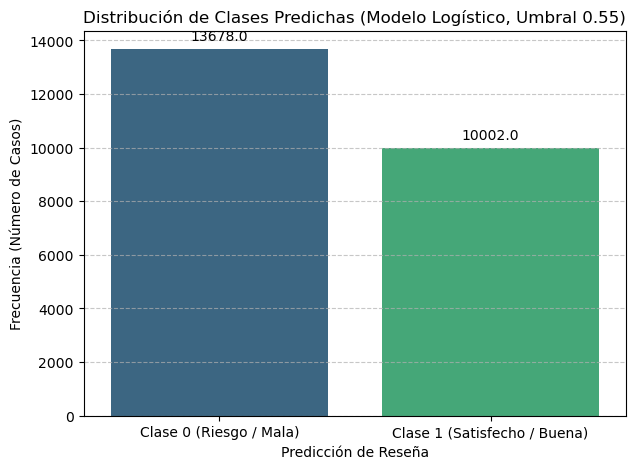

In [50]:
plt.figure(figsize=(7, 5))
ax = sns.countplot(x=y_pred_ajustado, palette='viridis')

plt.title('Distribución de Clases Predichas (Modelo Logístico, Umbral 0.55)')
plt.xlabel('Predicción de Reseña')
plt.ylabel('Frecuencia (Número de Casos)')

ax.set_xticks([0, 1])
ax.set_xticklabels(['Clase 0 (Riesgo / Mala)', 'Clase 1 (Satisfecho / Buena)'])

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 9), 
                textcoords='offset points')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()